In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
np.random.normal(0, 1)

-0.5966437347545973

In [222]:
df = pd.read_csv('fantasy_football_sim.csv')
df = df[df.Week>=7]
df.head()

,Week,Eric,Quinn,Nate,Ben,Nick,Lo
6,7,105.50,121.56,105.66,79.62,126.24,108.40
7,8,112.34,122.14,108.62,97.34,83.76,96.72
8,9,112.94,114.50,104.42,88.00,74.06,87.30
9,10,109.14,96.00,101.32,81.82,110.14,102.46
10,11,93.58,131.04,114.58,79.88,97.62,105.24


In [223]:
players = {
    'Eric': {'mean_score':df['Eric'].mean()
            ,'stdev_score':df['Eric'].std()},
    'Quinn': {'mean_score':df['Quinn'].mean()
            ,'stdev_score':df['Quinn'].std()},
    'Nate': {'mean_score':df['Nate'].mean()
            ,'stdev_score':df['Nate'].std()},
    'Ben': {'mean_score':df['Ben'].mean()
            ,'stdev_score':df['Ben'].std()},
    'Nick': {'mean_score':df['Nick'].mean()
            ,'stdev_score':df['Nick'].std()},
    'Lo': {'mean_score':df['Lo'].mean()
            ,'stdev_score':df['Lo'].std()},
}

In [224]:
players

{'Ben': {'mean_score': 85.24333333333334, 'stdev_score': 6.726537494630257},
 'Eric': {'mean_score': 103.14999999999999, 'stdev_score': 11.210264938885253},
 'Lo': {'mean_score': 103.39, 'stdev_score': 11.099670265372751},
 'Nate': {'mean_score': 103.25333333333333, 'stdev_score': 10.040881767388093},
 'Nick': {'mean_score': 107.15333333333332, 'stdev_score': 28.41771184783649},
 'Quinn': {'mean_score': 117.48, 'stdev_score': 11.808234415017342}}

In [225]:
def matchup(player1, player2):
    """
    Match up two players using their historic mean and stdev of scores. 
    Return the one who has the higher score when put into a normal distributin
    """
    p1_score = np.random.normal(players[player1]['mean_score'], players[player1]['stdev_score'])
    p2_score = np.random.normal(players[player2]['mean_score'], players[player2]['stdev_score'])
    
    if p1_score >= p2_score:
        return player1
    else:
        return player2

# Abington Heights League

In [226]:
def simulate():
    
    quarterfinal1 = matchup('Ben', 'Lo')
    quarterfinal2 = matchup('Quinn', 'Nick')

    
    semifinal1 = matchup('Nate', quarterfinal1)
    semifinal2 = matchup('Eric', quarterfinal2)
    

    final = matchup(semifinal1, semifinal2)
    
    return final 
    

In [232]:
wins = []

for i in range(200000):
    wins.append(simulate())

In [233]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

In [234]:
percent_df = pd.DataFrame(percents, columns=['Win Probability']).reset_index()
percent_df.head()

,index,Win Probability
0,Quinn,0.417445
1,Nate,0.170540
2,Lo,0.155840
3,Eric,0.143310
4,Nick,0.112440


In [235]:
for i, row in percent_df.iterrows():
    print(row[1])

0.417445
0.17054
0.15584
0.14331
0.11244
0.000425


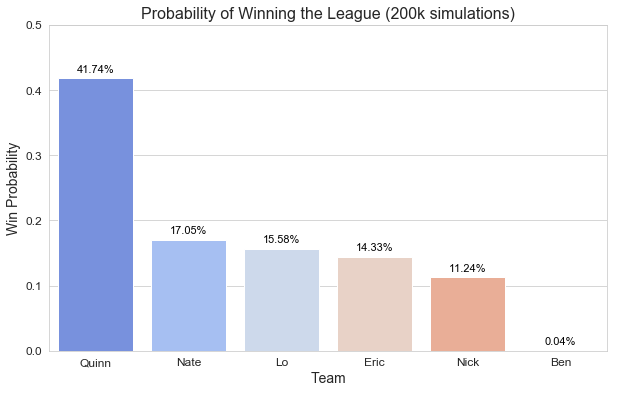

In [239]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("coolwarm"))

plt.figure(figsize=(10, 6))
sns.barplot(percent_df.index, percent_df['Win Probability'])

for i, row in percent_df.iterrows():
    plt.text(  i
             , row[1]+.01
             , s="{:.2%}".format(round(row[1], 5))
             , color='black'
             , ha="center"
             , fontsize=11
            )
    
plt.xticks(range(6), percent_df['index'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Probability of Winning the League (200k simulations)', fontsize=16)
plt.ylabel('Win Probability', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylim(0, .5)
plt.show()

# Lo's League

In [122]:
df = pd.read_csv('lo_fantasy.csv')
df = df[df.Week>=8]
df.head()

,Week,Lo,Dylan,Krieger,North,Jake,Peter
0,1,122.30,112.52,140.43,139.35,160.46,128.57
1,2,127.97,185.27,136.18,112.72,135.42,150.83
2,3,120.95,142.90,132.99,138.84,135.60,149.92
3,4,148.92,128.33,117.07,130.11,88.51,105.91
4,5,106.56,152.82,86.75,133.35,117.19,145.01


In [123]:
players = {
    'Lo': {'mean_score':df['Lo'].mean()
            ,'stdev_score':df['Lo'].std()},
    'Dylan': {'mean_score':df['Dylan'].mean()
            ,'stdev_score':df['Dylan'].std()},
    'Krieger': {'mean_score':df['Krieger'].mean()
            ,'stdev_score':df['Krieger'].std()},
    'North': {'mean_score':df['North'].mean()
            ,'stdev_score':df['North'].std()},
    'Jake': {'mean_score':df['Jake'].mean()
            ,'stdev_score':df['Jake'].std()},
    'Peter': {'mean_score':df['Peter'].mean()
            ,'stdev_score':df['Peter'].std()},
}

In [124]:
def simulate():
    
    quarterfinal1 = matchup('Lo', 'Peter')
    quarterfinal2 = matchup('Krieger', 'North')

    
    semifinal1 = matchup('Dylan', quarterfinal1)
    semifinal2 = matchup('Jake', quarterfinal2)
    

    final = matchup(semifinal1, semifinal2)
    
    return final 
    

In [125]:
wins = []

for i in range(100000):
    wins.append(simulate())

In [126]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

percents

Dylan      0.37011
Jake       0.20275
Peter      0.11608
North      0.10708
Lo         0.10584
Krieger    0.09814
dtype: float64

# DKE League